In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cebra
import cebra.datasets
from cebra import CEBRA


### 1. Load in Mthal data 
- CEBRA models 
- corrisponding embeddings (create from models and neural data)
- discerte_lables (what was used to train the model)
###### Neural Data
- neural_data (all nerual data (100%) full recording), 
- neural_train (neural data seperated into training group (80% of neural_data) that made corresponding cebra model)
- neural_test (neural data seperated into test group (20% of neural_data) that made corresponding cebra model)

In [40]:
mouse = 'reach1_4'

In [41]:
# variables to load different models and neural data
num_reaches = 278
probe = 'B' # probe used for the neural data
bin_size_in_ms = 50 # in milliseconds
output_dimension = 32 # number of dimensions for the embeddingspre
pre_reach = 1
post_reach = 10

load full neural_data

In [42]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
mthal_neural_data = neural_data_transposed

(538, 61160)
(61160, 538)


load neural data (train and test)

In [43]:
path_ = f'train_test_data/{mouse}_neural_train.npy'
neural_train = np.load(path_)

path_ = f'train_test_data/{mouse}_neural_test.npy'
neural_test = np.load(path_)

path_ = f'train_test_data/{mouse}_label_train.npy'
label_train = np.load(path_)

path_ = f'train_test_data/{mouse}_label_test.npy'
label_test = np.load(path_)

neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 538), (12232, 538), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [44]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'B' # probe letter

In [45]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)


load discerte_lables 

In [46]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
discete_lables.shape
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(array([0., 1., 2.]), array([0., 1.]))

preview embeddings

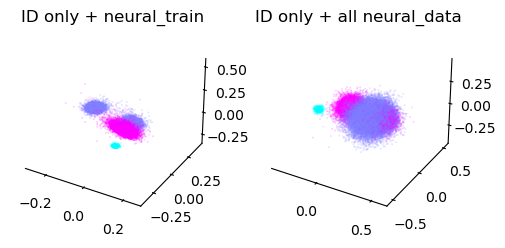

((48928, 32), (61160, 32))

In [47]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,0], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,0], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

load cebra-time models (not trained with lables)

Text(0.5, 0.98, 'CEBRA-Time Model, Mthal')

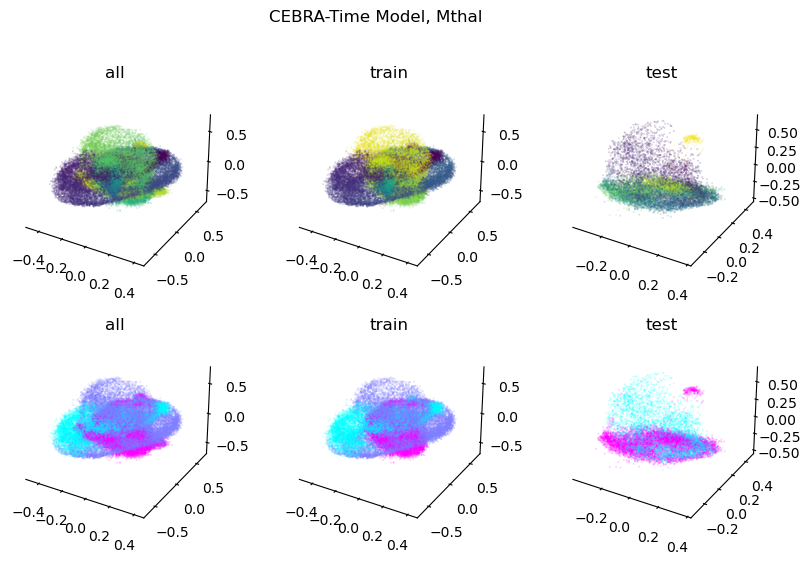

In [48]:
path_0 = "reach1_4_50msFr_0.001LR_1000MI_outDim32_B_2024-03-29_19-31-13_timeOnly.cebra"
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim32_B_2024-04-02_13-07-00_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, Mthal')

In [49]:
mthal_embedding_train = cebra_time_train
mthal_embedding_all = cebra_time_all

### 1.2 Load in M1 data 


In [89]:
probe = 'A' # probe used for the neural data
P = probe

load full neural data

In [90]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
m1_neural_data = neural_data_transposed

(45, 61160)
(61160, 45)


load neural_data (test and train)

In [52]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = neural_data_transposed[:split_idx]
    neural_test = neural_data_transposed[split_idx:]
    label_train = discete_lables[:split_idx]
    label_test = discete_lables[split_idx:]

    return neural_train, neural_test, label_train, label_test

neural_train, neural_test, label_train, label_test = split_data(neural_data_transposed, 0.2)
neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 45), (12232, 45), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [53]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'A' # probe letter

In [54]:
np.unique(label_train[:,0]), np.unique(label_train[:,1])

(array([0., 1., 2.]), array([0., 1.]))

In [55]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)

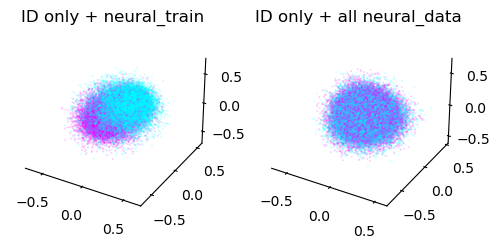

((48928, 32), (61160, 32))

In [56]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,1], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,1], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

In [57]:
m1_embedding_train= cebra_posdir_train
m1_embedding_all = cebra_pos_all

Text(0.5, 0.98, 'CEBRA-Time Model, M1')

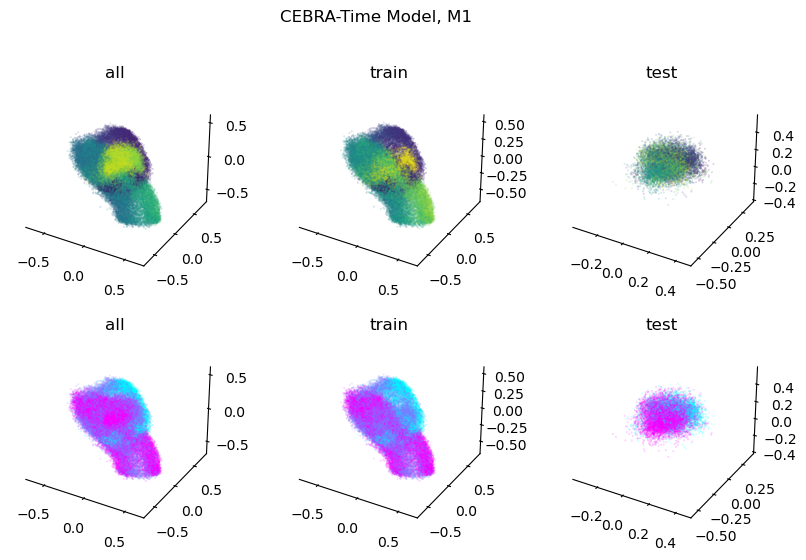

In [58]:
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim20_A_2024-04-01_18-58-59_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, M1')

In [59]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all


### 2. Construct RNN

In [60]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

prepare input and target data

In [91]:
input = mthal_neural_data
# target = m1_embedding_all
target = m1_neural_data
input.shape, target.shape   

((61160, 538), (61160, 45))

In [92]:
# Slice to keep only the first 20 columns
# input = input[:, :20]

In [93]:
# Assuming input and target are numpy arrays or PyTorch tensors of shape (48928, 32)
# First, calculate the number of complete reaches in the training set
num_reaches_train = 278   # Calculate 80% of reaches for training
print(num_reaches_train)
# Since each reach has 210 time bins, calculate the total number of bins used for training
total_bins_train = int(num_reaches_train * 220)  # Make sure to use int for exact number conversion

# Now reshape input and target tensors for the training set
input_tensor = torch.tensor(input[:total_bins_train]).reshape(-1, 220, 538)  # Reshape to (222, 210, 32)
target_tensor = torch.tensor(target[:total_bins_train]).reshape(-1, 220, 45)  # Reshape to (222, 210, 32)

# Convert the existing tensors to float32 if they are not already
input_tensor = input_tensor.float()
target_tensor = target_tensor.float()


# Create a TensorDataset
train_dataset = TensorDataset(input_tensor, target_tensor)


# Optionally create a validation dataset using the remaining data if needed
input_tensor.shape, target_tensor.shape

278


(torch.Size([278, 220, 538]), torch.Size([278, 220, 45]))

In [94]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# Create a TensorDataset
dataset = TensorDataset(input_tensor, target_tensor)
print(len(dataset))
# Split into train and validation
train_size = int(0.8 * len(dataset))
print(train_size)
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

278
222


PyTorch rnn #1
- no dropouts

In [95]:
# Adjusting the model for the specific neural data task
class NeuralRNN(nn.Module):
    def __init__(self, input_size=538, hidden_size=64, num_layers=1, output_size=45):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()



pytorch rnn #2
- added drop outs

In [96]:

class NeuralRNN(nn.Module):
    def __init__(self, input_size=538, hidden_size=64, num_layers=1, output_size=45, dropout=0.5):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Apply dropout to each RNN layer except the last layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()

### 3. Train RNN 
- Input: Mthal embedding data
- Targert: M1 embedding data
- Output: Predicted M1 embedding data

In [97]:
weight_decay = True
early_stop = True
num_epochs = 10000

# Initialize early stopping criteria
early_stopping_patience = 10
min_val_loss = float('inf')
stop_counter = 0

In [98]:
import torch
loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task


optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.0003)  # Using Adam optimizer

if weight_decay:
    optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.0003, weight_decay=0.01)  # Adding L2 regularization


weight_history = []
# Assuming neural_rnn, train_loader, and val_loader are already defined
for epoch in range(num_epochs):
    # Training phase
   
    neural_rnn.train()  # Set the model to training mode
    train_loss = 0.0
    all_outputs = []
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = neural_rnn(inputs)  # Forward pass: compute the output
        loss = loss_function(outputs, targets)
        loss.backward()  # Backward pass: compute the gradient of the loss with respect to model parameters
        optimizer.step()  # Update parameters
        train_loss += loss.item() * inputs.size(0)  # Multiply by batch size to undo averaging in loss calculation
        all_outputs.append(outputs)

        # Save weights
        layer_weights = {name: parameter.data.clone() for name, parameter in neural_rnn.named_parameters()}
        weight_history.append(layer_weights)
    all_outputs = torch.cat(all_outputs, dim=0)  # Concatenate along the batch dimension
    train_loss /= len(train_loader.dataset)  # Average loss for the epoch

    # Validation phase
    neural_rnn.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    all_val_outputs = []
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        for inputs, targets in val_loader:
            outputs_val = neural_rnn(inputs)
            loss = loss_function(outputs_val, targets)
            val_loss += loss.item() * inputs.size(0)
            all_val_outputs.append(outputs_val)

    all_val_outputs = torch.cat(all_val_outputs, dim=0)  
    val_loss /= len(val_loader.dataset)  # Average loss for the epoch

    
    # # Early stopping check
    if early_stop:
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            stop_counter = 0  # reset the counter if improvement is seen
        else:
            stop_counter += 1
        if stop_counter >= early_stopping_patience:
            print(f"Stopping early at epoch {epoch+1}")
            break

    # Print epoch statistics every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')


Epoch 1 	Training Loss: 148.4018 	Validation Loss: 146.9017
Epoch 101 	Training Loss: 119.0051 	Validation Loss: 117.8277
Epoch 201 	Training Loss: 107.8686 	Validation Loss: 106.7762
Epoch 301 	Training Loss: 99.8550 	Validation Loss: 98.9982
Epoch 401 	Training Loss: 93.8912 	Validation Loss: 93.3248
Epoch 501 	Training Loss: 89.1796 	Validation Loss: 89.0950
Epoch 601 	Training Loss: 85.2544 	Validation Loss: 85.7564
Epoch 701 	Training Loss: 81.7163 	Validation Loss: 82.8960
Epoch 801 	Training Loss: 78.6042 	Validation Loss: 80.5817
Epoch 901 	Training Loss: 75.8678 	Validation Loss: 78.6436
Epoch 1001 	Training Loss: 73.5612 	Validation Loss: 77.1455
Epoch 1101 	Training Loss: 71.4302 	Validation Loss: 75.7674
Epoch 1201 	Training Loss: 69.5257 	Validation Loss: 74.6034
Stopping early at epoch 1240


addidtional Model Evaluation Adjustments

In [99]:
epoch = 1000

In [100]:
def calculate_metrics(outputs, targets):
    # You can define any metric here, such as mean squared error
    mse = nn.MSELoss()(outputs, targets)
    return mse.item()

# Adjust the main training loop to include metric calculation
for epoch in range(num_epochs):
    # Existing training and validation loops here

    # Calculate additional metrics or diagnostics
    train_mse = calculate_metrics(all_outputs, torch.cat([y for _, y in train_loader], dim=0))
    val_mse = calculate_metrics(all_val_outputs, torch.cat([y for _, y in val_loader], dim=0))

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f} \tTrain MSE: {train_mse:.4f} \tVal MSE: {val_mse:.4f}')

Epoch 1 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 86.2345 	Val MSE: 74.2026
Epoch 101 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 86.1440 	Val MSE: 74.2026
Epoch 201 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 87.9148 	Val MSE: 74.2026
Epoch 301 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 87.3039 	Val MSE: 74.2026
Epoch 401 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 86.8762 	Val MSE: 74.2026
Epoch 501 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 86.9734 	Val MSE: 74.2026
Epoch 601 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 86.7023 	Val MSE: 74.2026
Epoch 701 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 87.1743 	Val MSE: 74.2026
Epoch 801 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 86.4008 	Val MSE: 74.2026
Epoch 901 	Training Loss: 68.8686 	Validation Loss: 74.2026 	Train MSE: 86.8612 	Val MSE: 74.2026
Epoch 1001 	Training L

KeyboardInterrupt: 

In [101]:
from datetime import datetime

# Get the current date and time formatted as a string (e.g., "2023-03-28_15-30-45")
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [102]:
rnn_save_path = f'rnn_models/rnn_model_{num_epochs}_{mouse}_{current_datetime}.pth'
# Saving the model
torch.save(neural_rnn.state_dict(), rnn_save_path)

# Loading the model
neural_rnn_loaded = NeuralRNN()  # Ensure it has the same architecture
neural_rnn_loaded.load_state_dict(torch.load(rnn_save_path))
neural_rnn_loaded.eval()  # Set to evaluation mode if inference only

# If you want to continue training, switch back to train mode
neural_rnn_loaded.train()


NeuralRNN(
  (rnn): RNN(538, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=45, bias=True)
)

In [76]:
# # Assuming you have tensors input_tensor and target_tensor prepared
# loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task
# optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.0003)  # Using Adam optimizer

# num_epochs = 5000

# # Example training loop
# for epoch in range(num_epochs):
#     optimizer.zero_grad()               # Clear existing gradients
#     output_tensor = neural_rnn(input_tensor)  # Get the model's predictions
#     loss = loss_function(output_tensor, target_tensor)  # Calculate the loss
#     loss.backward()                     # Compute gradient of the loss wrt model parameters
#     optimizer.step()    
#                     # Perform a single optimization step
#     # print every 25 epochs
#     if epoch % 150 == 0:
#         print(f"Epoch {epoch}: Loss = {loss.item()}")


### 4. Visualize Embeddings
- Compare cebra M1 embeddings to RNN predicted embeddings

In [77]:
target_tensor[0][0].detach().numpy(),output_tensor[0][0].detach().numpy()
target_tensor[:,].detach().numpy().shape,output_tensor[:,].detach().numpy().shape

m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all

NameError: name 'output_tensor' is not defined

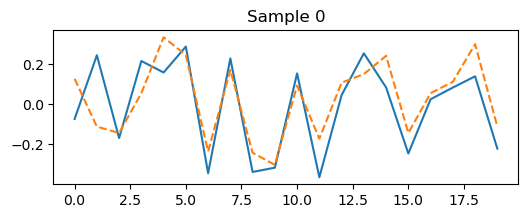

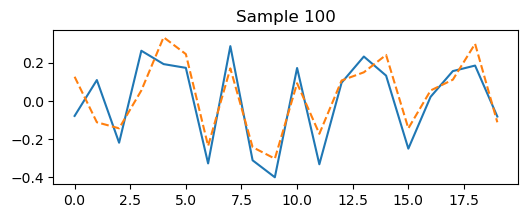

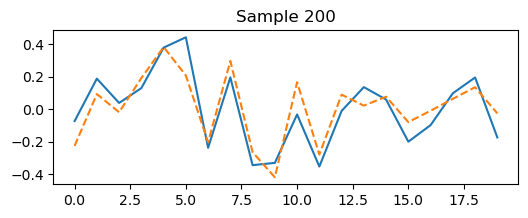

In [29]:
import matplotlib.pyplot as plt

# Select a few sample sequences
sample_indices = [0,100,200]  # Example indices
for idx in sample_indices:
    plt.figure(figsize=(6,2))
    plt.plot(target_tensor[0][idx].detach().numpy(), label='Target')
    plt.plot(output_tensor[0][idx].detach().numpy(), label='Prediction', linestyle='--')
    plt.title(f'Sample {idx}')
    # plt.legend()
    plt.show()


In [30]:
target_embedding = target_tensor.detach().numpy()
rnn_output_embedding = output_tensor.detach().numpy()
target_embedding.shape,rnn_output_embedding.shape

((278, 220, 20), (278, 220, 20))

In [31]:
# Reshape the array to (30580, 32)
rnn_output_embedding = rnn_output_embedding.reshape(-1, 20)
target_embedding = target_embedding.reshape(-1, 20)
rnn_output_embedding.shape, target_embedding.shape

((61160, 20), (61160, 20))

In [32]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all
m1_embedding_all.shape, m1_embedding_train.shape

((61160, 20), (48928, 20))

In [83]:
rnn_output_embedding = all_outputs.detach().numpy()
rnn_val_embedding = all_val_outputs.detach().numpy()
rnn_output_embedding.shape, rnn_val_embedding.shape, input.shape, target.shape

((222, 220, 20), (56, 220, 20), (61160, 538), (61160, 20))

In [79]:
# Reshape the array to (30580, 32)
rnn_output_embedding = rnn_output_embedding.reshape(-1, 20)
rnn_val_embedding = rnn_val_embedding.reshape(-1, 20)
input_embedding = input..reshape(-1, 20)
rnn_output_embedding.shape, rnn_val_embedding.shape

((48840, 20), (12320, 20))

In [80]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all
m1_embedding_all.shape, m1_embedding_train.shape

((61160, 20), (48928, 20))

ValueError: 'c' argument has 222 elements, which is inconsistent with 'x' and 'y' with size 4440.

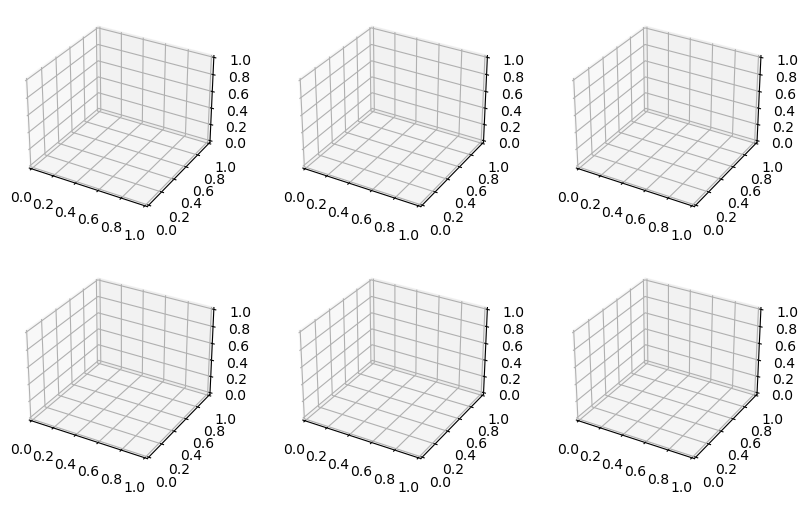

In [84]:
plt.figure(figsize=(10, 6))
index_order = (0,1,2)
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels='time', title='rnn output')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=input, embedding_labels='time', title='Mthal rnn Input')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=target, embedding_labels='time', title='M1 rnn target')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=rnn_val_embedding, embedding_labels='time', title='rnn val output')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=input, embedding_labels=discete_lables[:,0], title='Mthal rnn input')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=target, embedding_labels=discete_lables[:,0], title='M1 rnn target')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

### 5. Decode lables from embeddings
- Decode lables (trial_ID, Success or Failure) from cebra embeddings
- Decode lables (trial_ID, Success or Failure) from RNN predicted embeddings

### 6. Pass real M1 embeddings cerebellar SNN
- See if SNN can predict when their is an error